<a href="https://colab.research.google.com/github/leticiaram/Modelacion-Epidemiologica/blob/main/1_Metodos_Numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## En estos ejemplos consideramos el modelo SIR

# Cargamos librerias

In [ ]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

# Runge-Kutta 1

## Definimos el modelos epidemiológico

In [ ]:
# Modelo en términos de ODEs
def ode_SIR(t,INP,beta,gamma):
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y

## Especificamos parámetros y condiciones iniciales

In [ ]:
beta = 1.42/1e6
gamma = 0.142

S0 = 1e6
I0 = 1
INPUT = (S0, I0, 0.0)

t_start = 0.0;
t_end = 70;
t_inc = 1.0                      # Corresponde a h
t_range = np.arange(t_start, t_end+t_inc, t_inc)

## Runge-Kutta ("a pie")




In [ ]:
def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(t[i], y[i],  *args)
    return y

## Solución

In [ ]:
sol = rungekutta1(ode_SIR, INPUT,t_range,args=(beta,gamma,))

## Graficas de las soluciones

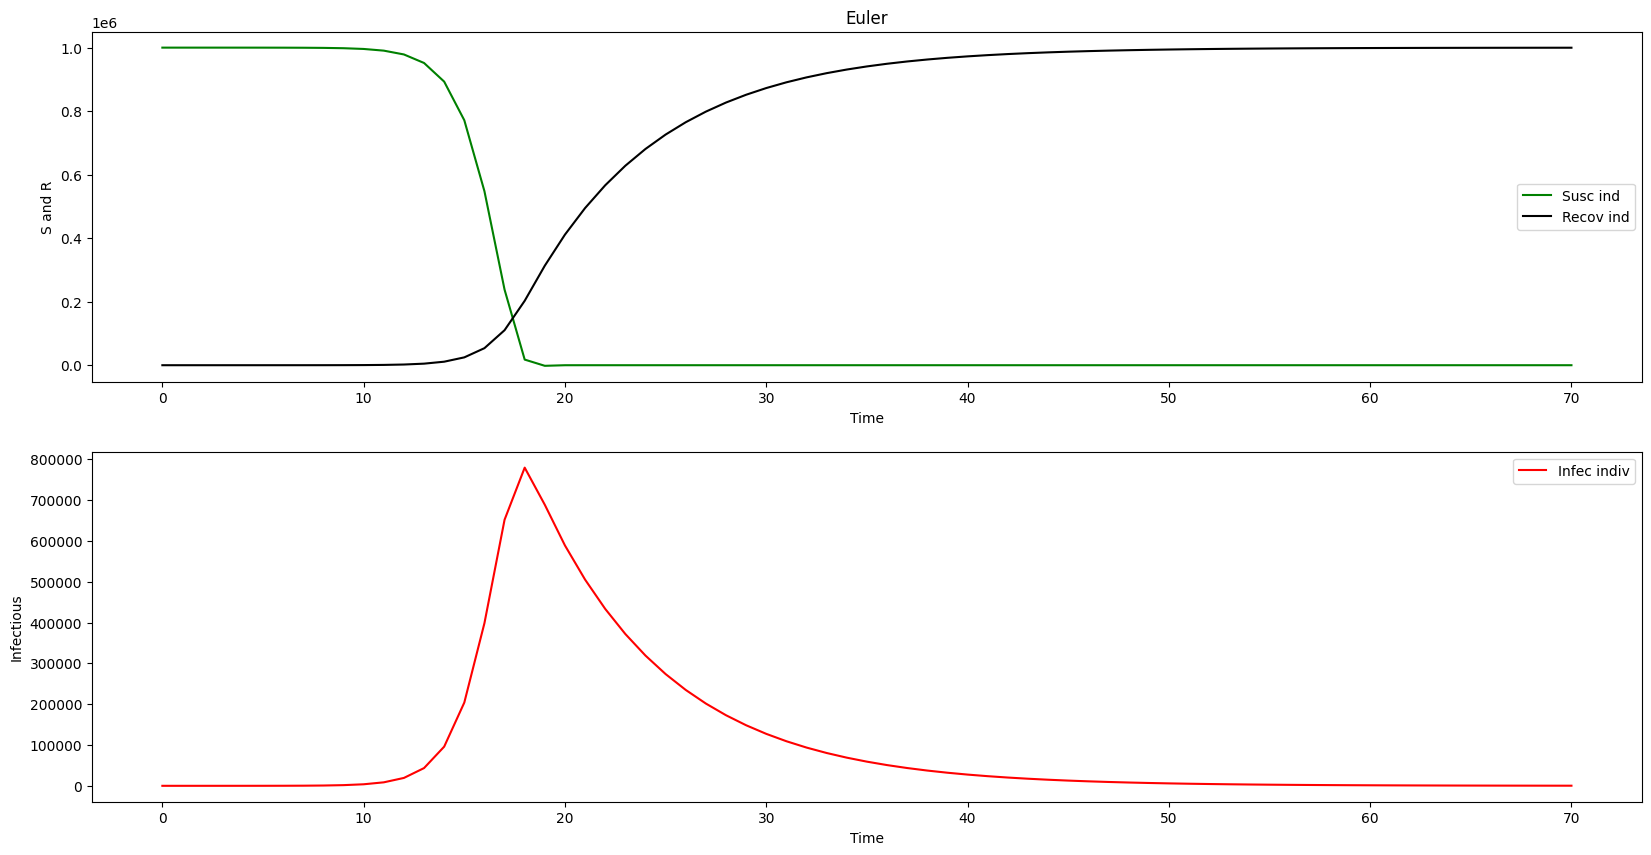

In [ ]:
pl.figure(figsize=(20, 10))
pl.subplot(211)
pl.plot(t_range,sol[:,0], '-g', label='Susc ind')
pl.plot(t_range,sol[:,2], '-k', label='Recov ind')
pl.legend(loc=0)
pl.title('Euler')
pl.xlabel('Time')
pl.ylabel('S and R')
pl.subplot(212)
pl.plot(t_range,sol[:,1], '-r', label='Infec indiv')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()

# Runge-Kutta 2

Los métodos Runge-Kutta tienen la expresión general
$$
y_{n+1}=y_n+h F\left(t_n, y_n ; h\right), \quad n \geq 0, \quad y_0=Y_0.
$$
Para el método de orden 2 , escogemos

$$
F(t, y ; h)=b_1 f(t, y)+b_2 f(t+\alpha h, y+\beta h f(t, y))
$$
y determinamos las constantes $\left\{\alpha, \beta, b_1, b_2\right\}$ tal que la solución de tenga un error de orden $\mathcal{O}(h^3)$ ($o(h^2)$). Para ésto, los coeficientes deben satisfacer
$$
\left\{\begin{array}{l}
1-b_1-b_2=0 \\
1-2 b_2 \alpha=0 \\
1-2 b_2 \beta=0
\end{array}\right.
$$
Esto es,
$$
b_2 \neq 0, \quad b_1=1-b_2, \quad \alpha=\beta=\frac{1}{2 b_2}.
$$

Entonces hay una  familia de métodos de Runge-Kutta de orden 2 dependiendo de la selección de  $b_2$. Las opciones más comunes son $b_2=1 / 2,3 / 4$, and 1 .

### A continuación implementamos Runge-Kutta 2 con $b_2 = 1$, $b_1 = 0$ y  $\alpha = \beta = 1/2.$

In [ ]:
#Runge-Kutta 2 con b2 = 1, b1 = 0, alfa = beta = 1/2
def rungekutta2(f, t, y0,  args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(t[i] + h / 2., y[i] + h / 2. * f(t[i], y[i], *args), *args)
    return y

In [ ]:
sol = rungekutta2(ode_SIR, t_range, INPUT, args=(beta,gamma,))

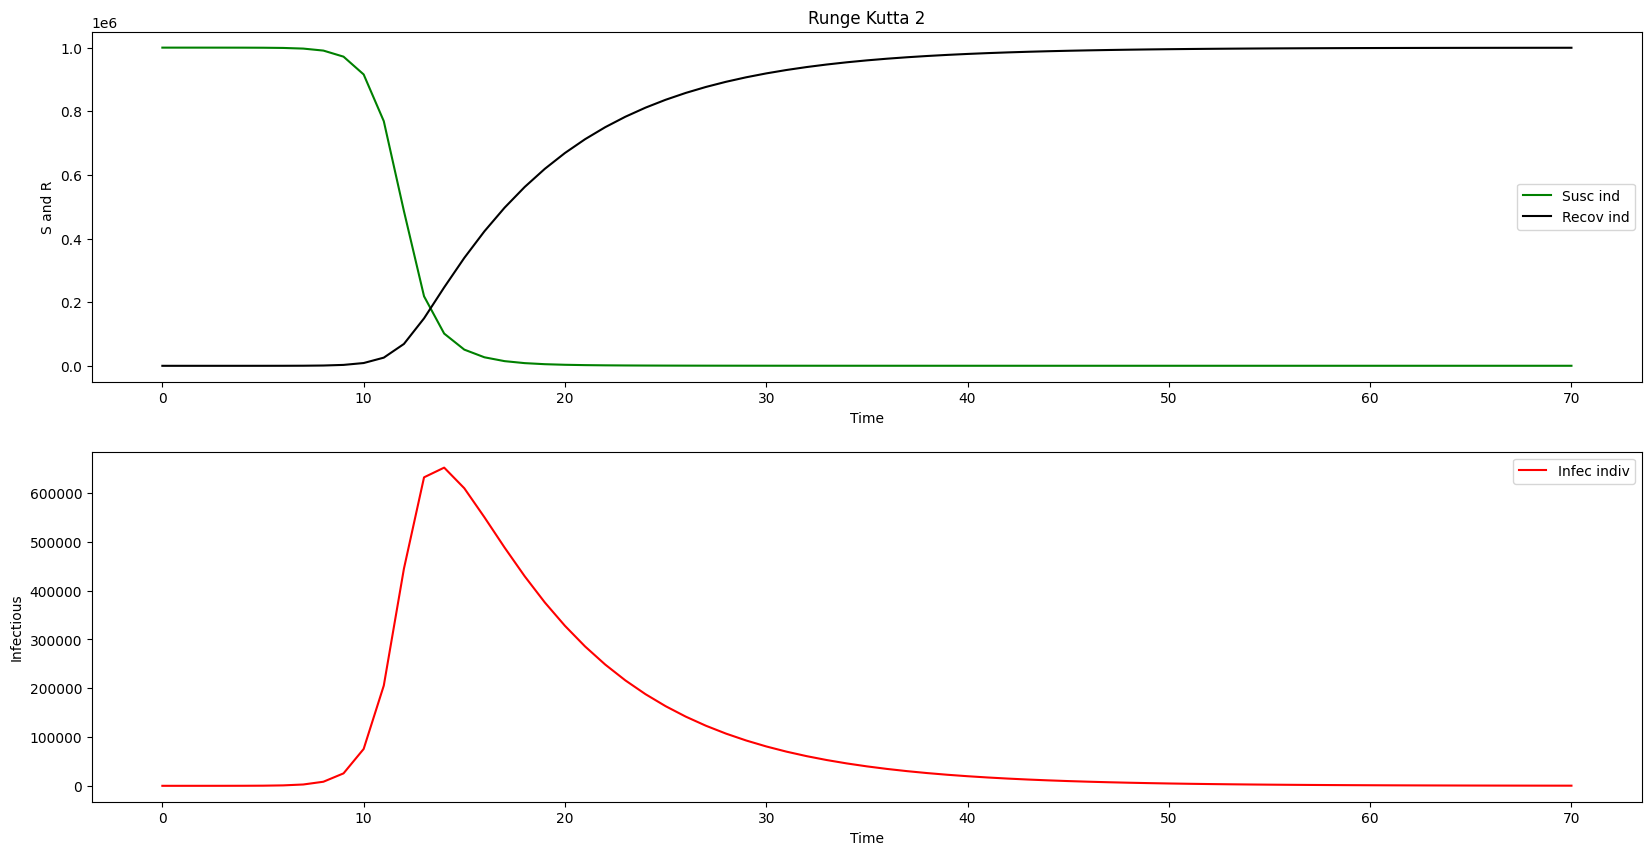

In [ ]:
pl.figure(figsize=(20, 10))
pl.subplot(211)
pl.plot(sol[:,0], '-g', label='Susc ind')
pl.plot(sol[:,2], '-k', label='Recov ind')
pl.legend(loc=0)
pl.title('Runge Kutta 2')
pl.xlabel('Time')
pl.ylabel('S and R')
pl.subplot(212)
pl.plot(sol[:,1], '-r', label='Infec indiv')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()

# Runge-Kutta 4

$$
\begin{aligned}
& z_1=y_n, \\
& z_2=y_n+\frac{1}{2} h f\left(t_n, z_1\right) \text {, } \\
& z_3=y_n+\frac{1}{2} h f\left(t_n+\frac{1}{2} h, z_2\right), \\
& z_4=y_n+h f\left(t_n+\frac{1}{2} h, z_3\right) \text {, }
\end{aligned}
$$

$$
y_{n+1}=y_n+\frac{1}{6} h\left[f\left(t_n, z_1\right)+2 f\left(t_n+\frac{1}{2} h, z_2\right)+2 f\left(t_n+\frac{1}{2} h, z_3\right)+f\left(t_n+h, z_4\right)\right] .
$$

La tabla Butcher es
$$
\begin{array}{c|cccc}
0 & & & & \\
1 / 2 & 1 / 2 & & & \\
1 / 2 & 0 & 1 / 2 & & \\
1 & 0 & 0 & 1 & \\
\hline & 1 / 6 & 1 / 3 & 1 / 3 & 1 / 6
\end{array}
$$

En este caso $T_{n+1}=\mathcal{O}\left(h^5\right)$.



In [ ]:
def rungekutta4(f, t, y0, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], y[i],  *args)
        k2 = f(t[i] + h / 2., y[i] + h / 2. * k1,  *args)
        k3 = f(t[i] + h / 2., y[i] + h / 2. * k2 ,  *args)
        k4 = f(t[i] + h, y[i] + h * k3, *args)

        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [ ]:
sol = rungekutta4(ode_SIR, t_range, INPUT, args=(beta,gamma,))

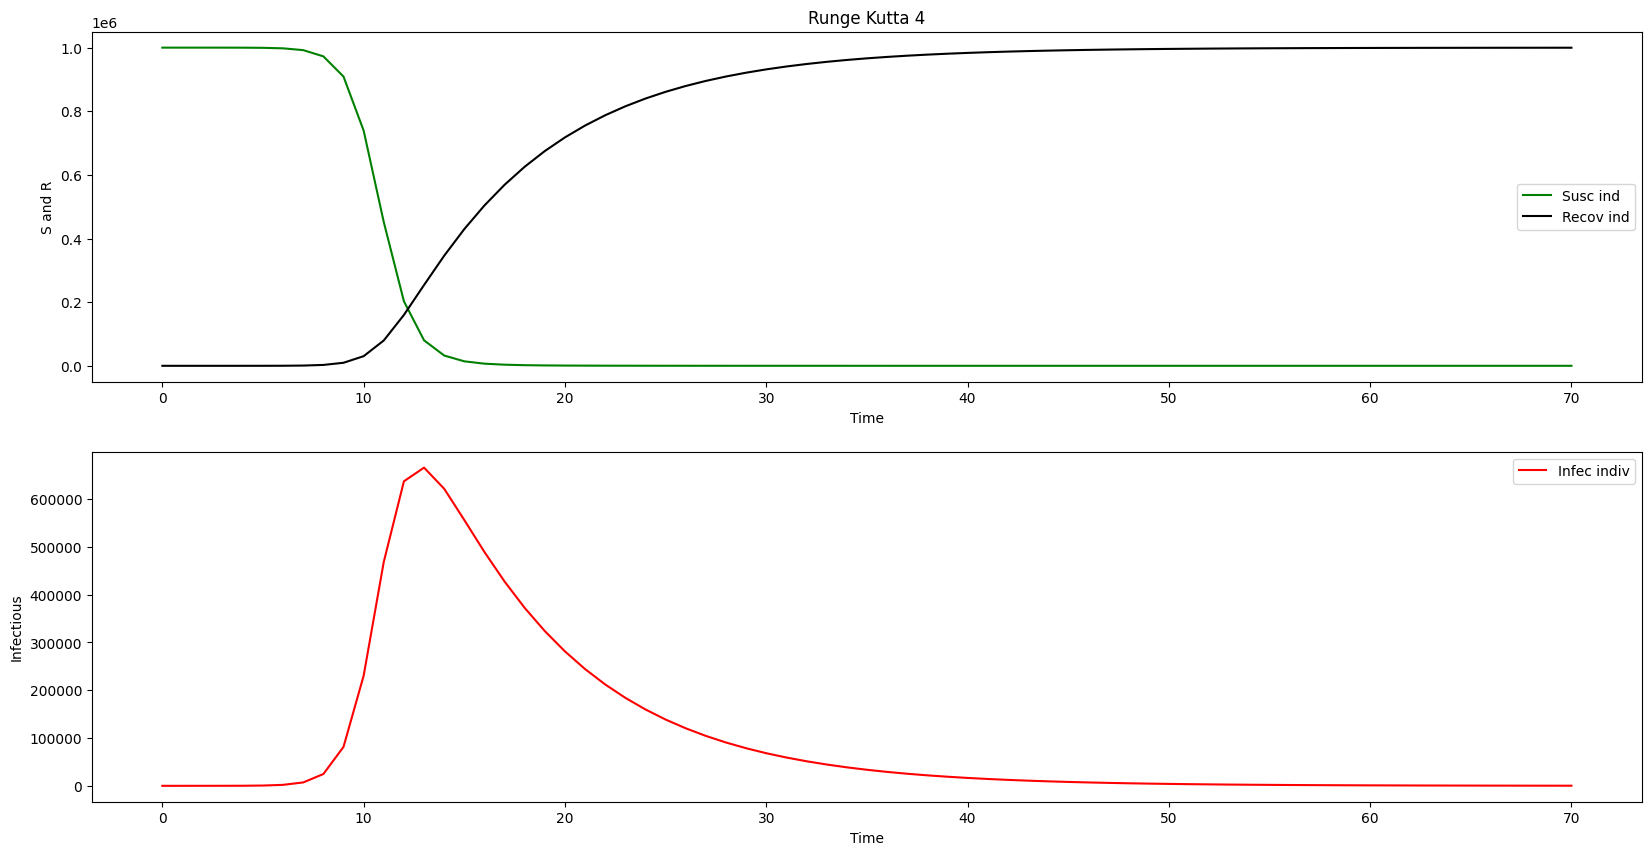

In [ ]:
pl.figure(figsize=(20, 10))
pl.subplot(211)
pl.plot(sol[:,0], '-g', label='Susc ind')
pl.plot(sol[:,2], '-k', label='Recov ind')
pl.legend(loc=0)
pl.title('Runge Kutta 8')
pl.xlabel('Time')
pl.ylabel('S and R')
pl.subplot(212)
pl.plot(sol[:,1], '-r', label='Infec indiv')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()

# Runge-Kutta 8

Para esta implementación de Runge-Kutta usamos un integrador ya implementado en Python. Más información en:

https://docs.scipy.org/doc/scipy/reference/integrate.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.DOP853.html

In [ ]:
#se establece la función, el método y los valores iniciales
solver = spi.ode(ode_SIR)
solver.set_integrator('dop853')  #Runge-Kutta 8
solver.set_f_params(beta,gamma)
solver.set_initial_value([S0, I0, 0.0],0)
sol = np.empty((t_range.size, 3))
sol[0] = [S0, I0, 0.0]

In [ ]:
# Iterativamente se llama `integrate` para obtener las soluciones consecutivas
# en los tiempos t[k]. Las soluciones se guardan en sol[k].
k = 1
while solver.successful() and solver.t < t_end:
    solver.integrate(t_range[k])
    sol[k] = solver.y
    k += 1

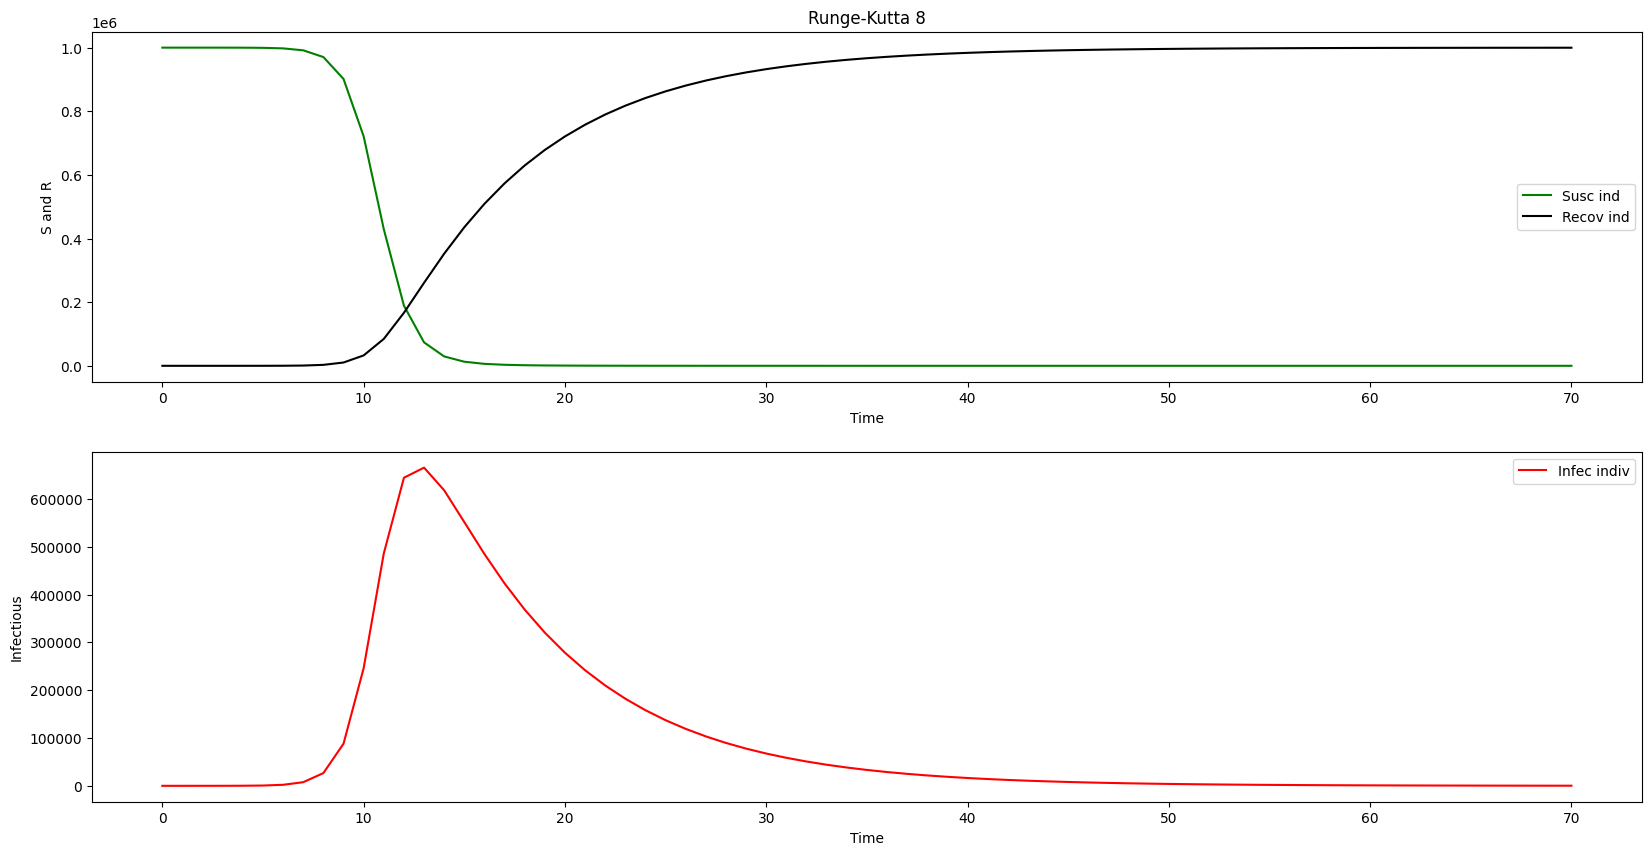

In [ ]:
pl.figure(figsize=(20, 10))
pl.subplot(211)
pl.plot(sol[:,0], '-g', label='Susc ind')
pl.plot(sol[:,2], '-k', label='Recov ind')
pl.legend(loc=0)
pl.title('Runge-Kutta 8')
pl.xlabel('Time')
pl.ylabel('S and R')
pl.subplot(212)
pl.plot(sol[:,1], '-r', label='Infec indiv')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()

# Usando Odeint

Odeint es un integraodr de ODEs que usa lsoda de la libreria de  FORTRAN odepack. Usa diferentes métodos de integración de acuerdo a la complejidad del sistema y su estabilidad. Más detalles en:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

https://computing.llnl.gov/projects/odepack


Para usar el integrador odeint tenemos que redefinir la funcion ode_SIR para que el primer argumento sea y0 y el segundo, el tiempo.

In [ ]:
# Modelo en términos de ODEs
def ode_SIR2(INP,t, beta,gamma):
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y

In [ ]:
# Resolvemos usando odeint de scipy
SOL = spi.odeint(ode_SIR2,y0=INPUT,t=t_range,args=(beta,gamma,))

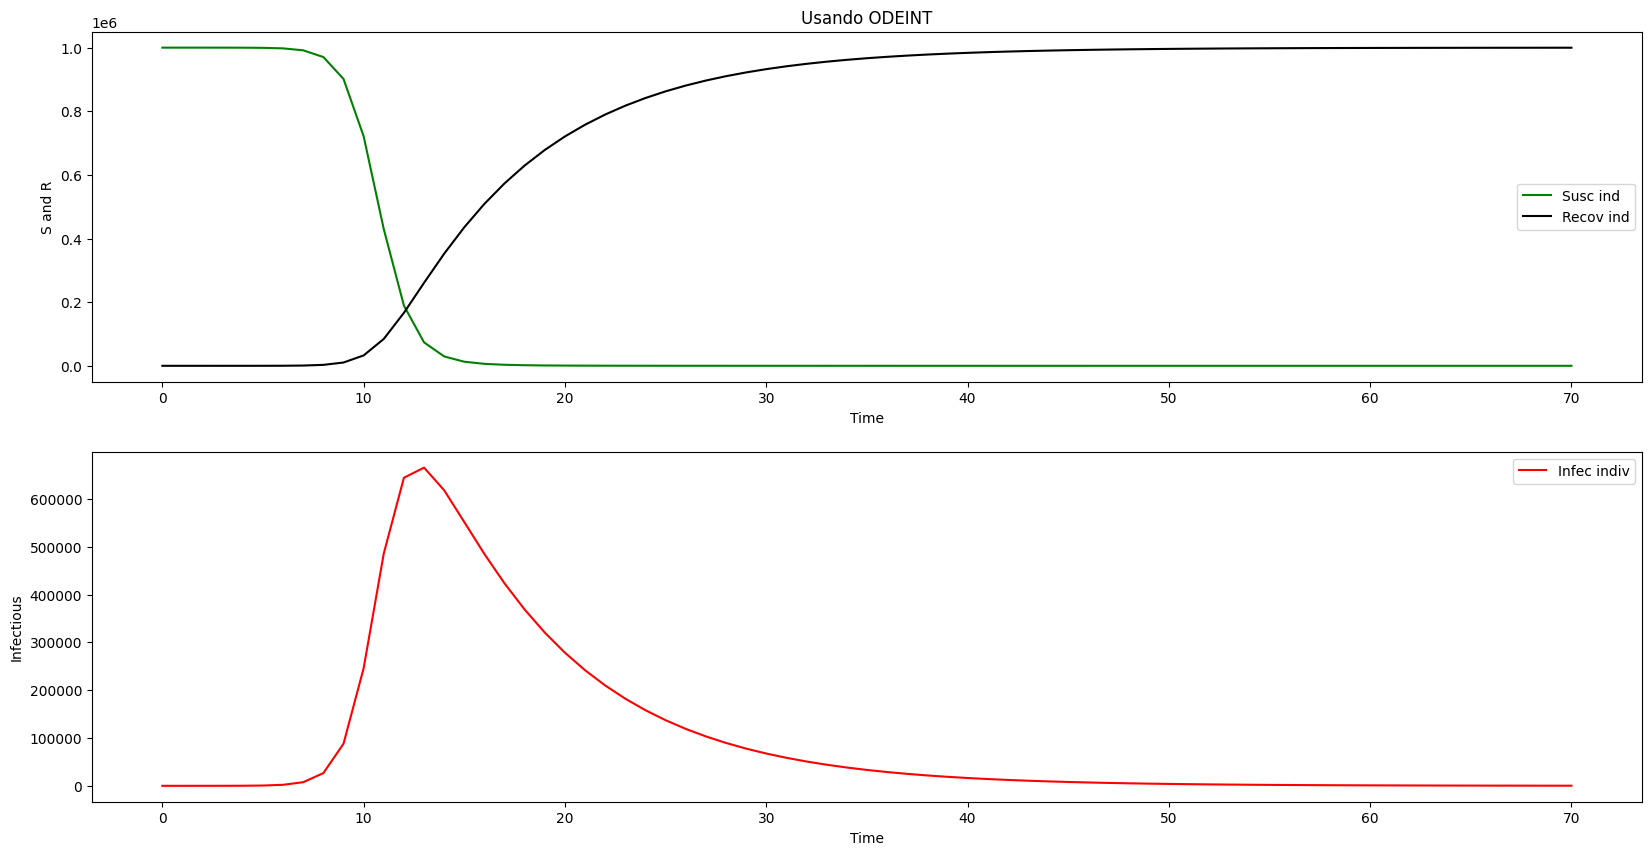

In [ ]:
pl.figure(figsize=(20, 10))
pl.subplot(211)
pl.plot(SOL[:,0], '-g', label='Susc ind')
pl.plot(SOL[:,2], '-k', label='Recov ind')
pl.legend(loc=0)
pl.title('Usando ODEINT')
pl.xlabel('Time')
pl.ylabel('S and R')
pl.subplot(212)
pl.plot(SOL[:,1], '-r', label='Infec indiv')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()